In [6]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
TRAIN_PATH = "../../data/train/gpt_ann_short.csv"
TEST_PATH = "../../data/test/ann_combo.csv"

train_df = pd.read_csv(TRAIN_PATH)
train_df = train_df[train_df["gpt_cleaned"].isin([0, 1])] # some responses are nan
test_df = pd.read_csv(TEST_PATH)

texts_train, texts_test, labels_train, labels_test = train_df["paragraph_content"], test_df["paragraph_content"], train_df["gpt_cleaned"], test_df["new_annotations"]

### Keyword Classifier

In [3]:
import spacy
NLP = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
KEYWORDS = {"vacc", "vaccine", "vaccinate", "vaccination", "immunize", "immunization", 'unvaccinated', 'vaxxed', 'flu', 'COVID-19', 'measles', 'COVID', 'measle', }

def hasKeyword(lemmatized):
    for word in lemmatized:
        if word in KEYWORDS:
            return 1
    return 0

def predict(texts):
    ret = []
    for doc in NLP.pipe(texts):
        lemmatized = [token.lemma_.lower() for token in doc]
        ret.append(hasKeyword(lemmatized))
    return ret

Accuracy: 94.79%
Recall: 84.96%
f1: 90.84%


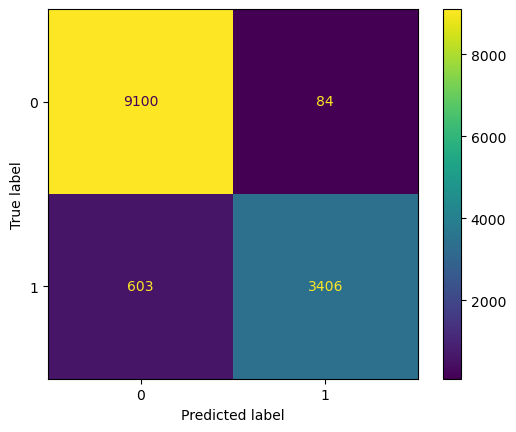

In [4]:
X_train = texts_train
y_train_pred = predict(X_train)
y_train = labels_train

fp = [i for i, (pred, true) in enumerate(zip(y_train_pred, y_train)) if (pred == 1 and true == 0)]
fn = [i for i, (pred, true) in enumerate(zip(y_train_pred, y_train)) if (pred == 0 and true == 1)]

accuracy = accuracy_score(labels_train, y_train_pred)
recall = recall_score(labels_train, y_train_pred)
f1 = f1_score(labels_train, y_train_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("f1: {:.2f}%".format(f1 * 100))

cm = confusion_matrix(y_train, y_train_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [ ]:
# get some examples of incorrect classifications
for sen in [X_train[i] for i in fp]:
    print(sen)
print("-" * 50)
for sen in [X_train[i] for i in fn][100:]:
    print(sen)

text = 'Contracting measles at the appropriate age of 7 to 11 years would eliminate the necessity of this medication.'
print(hasKeyword([token.lemma_.lower() for token in NLP(text)]))
print([token.lemma_.lower() for token in NLP(text)])


### Evaluating on self-labeled test

Accuracy: 92.86%
Precision: 99.31%
Recall: 89.47%
f1: 94.14%


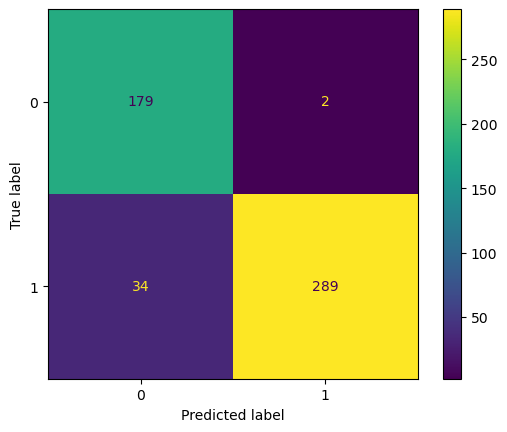

In [8]:
y_test_pred = predict(texts_test)
y_test = labels_test

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("f1: {:.2f}%".format(f1 * 100))

cm = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()